In [1]:
#***************************************************************
#This code ys based on the next example:
#https://www.tensorflow.org/tutorials/images/cnn
#***************************************************************

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

### Functions

In [4]:
def download_split_cifar_10():
    """
    This function download the CIFAR 10.
    CIFAR 10 contain 60.000 images in colour, separated in 10 clases.
    50.000 images are for training and 10.000 are separated for test.

    Arguments: nothing
    Return: train_images, train_labels, test_images, test_labels 
    """
    #Download CIFAR and separate in training and test data    
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0


    return train_images, train_labels, test_images, test_labels 

In [5]:
def convolution_pooling(channels_first_layer, kernel_size, max_pooling_size, channels_other_layer):
    """
    This function procces the convolution and th pooling using maxpooling.

    Args: Channels

    Return: model
    
    """

    #Sequential model
    model = models.Sequential()
    
    #Add layers.
    #For Conv2d define the channel_layer, kernel_size, activation function and input shape
    #For Max Pooling define the dimensions
    model.add(layers.Conv2D(channels_first_layer, (kernel_size, kernel_size), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((max_pooling_size, max_pooling_size)))
    model.add(layers.Conv2D(channels_other_layer, (kernel_size, kernel_size), activation='relu'))
    model.add(layers.MaxPooling2D((max_pooling_size, max_pooling_size)))
    model.add(layers.Conv2D(channels_other_layer, (kernel_size, kernel_size), activation='relu'))

    return model

In [6]:
def mlp(model, channels_last_layer, output_layer):
    """
    This function add a flatten and process the image after the convolution

    Args: model, channels_last_layer, output_layer
    Return: model with the MLP added
    """
    #The output layer is the number of th output to be classified
    model.add(layers.Flatten())
    model.add(layers.Dense(channels_last_layer, activation='relu'))
    model.add(layers.Dense(output_layer))

    return model

In [7]:
def compile(model):
    """
    Compile the model

    Args: model with the CNN and MLP
    Return: model compiled with the optimizer, loss and metrics

    """

    model.compile(optimizer='adam', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model

In [8]:
def fit_model(model, train_images, train_labels, test_images, test_labels, epochs):
    """
    Fit the model

    Args: model compiled
    Return: model fitted
    """

    model_fitted = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels))

    
    return model_fitted

In [9]:
def evaluate_model(model_compiled, model_fitted, test_images, test_labels):
    """
    This function evaluate the model

    Args: model_fitted
    Plot the accuracy
    """

    plt.plot(model_fitted.history['accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    test_loss, test_acc = model_compiled.evaluate(test_images,  test_labels, verbose=2)

In [10]:
def predict_image(image, image_dimension, image_channels, compile_model):
    """
    This function take a picture and predict the class. 

    Args: image
    Return: class of the image
    """

    read_image = cv2.imread(image)
    resize_image = cv2.resize(read_image,(image_dimension,image_dimension))
    reshape_image = np.reshape(resize_image,[1,image_dimension,image_dimension,image_channels])

    #Generate predictions for samples.
    #Have in mind that Softmax computes 
    #the probability that the input belongs to a particular class, for each class.
    predictions = compile_model.predict(reshape_image)

    #Take the max value generated by predictions. This is the class predicted.
    classes = np.argmax(predictions, axis = 1)

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    
    class_image = class_names[int(classes)]
  
    return class_image  

In [11]:
train_images, train_labels, test_images, test_labels = download_split_cifar_10()

In [12]:
#Dimension for an image
#For this case, 32x32x3
width, large, channels = train_images[0].shape

In [14]:
#Channels for the convolution result
channels_first_layer = 32
channels_other_layer = 64
#dimensions for the Kernel: nxn
kernel_size = 2
#dimensions for the pooling operation: mxm
max_pooling_size = 2


model = convolution_pooling(channels_first_layer, 
                            kernel_size, 
                            max_pooling_size, 
                            channels_other_layer)

In [15]:
channels_last_layer = 64
output_layer = 10

total_model = mlp(model, channels_last_layer, output_layer)

In [16]:
compile_model = compile(total_model)

In [17]:
epochs = 12

model_fitted = fit_model(compile_model, train_images, train_labels, test_images, test_labels, epochs)

Epoch 1/12
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4750 - accuracy: 0.4682 - val_loss: 1.2095 - val_accuracy: 0.5693
Epoch 2/12
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1217 - accuracy: 0.6029 - val_loss: 1.0452 - val_accuracy: 0.6256
Epoch 3/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9732 - accuracy: 0.6595 - val_loss: 0.9399 - val_accuracy: 0.6660
Epoch 4/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8793 - accuracy: 0.6920 - val_loss: 0.9071 - val_accuracy: 0.6856
Epoch 5/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8097 - accuracy: 0.7171 - val_loss: 0.8864 - val_accuracy: 0.6978
Epoch 6/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7509 - accuracy: 0.7395 - val_loss: 0.9815 - val_accuracy: 0.6626
Epoch 7/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6975 - accuracy: 0.7574 - val_loss: 0.8579 -

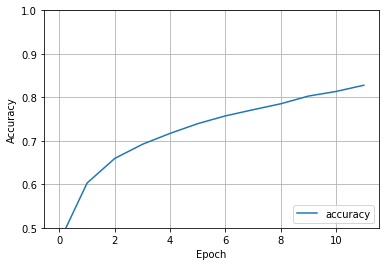

313/313 - 2s - loss: 0.9225 - accuracy: 0.7112 - 2s/epoch - 5ms/step


In [18]:
evaluate_model(compile_model, model_fitted, test_images, test_labels)

In [22]:
image = 'car.jpg'

#We considering dimensions for 32 x 32
image_dimension = width
image_channels = channels

class_image = predict_image(image, image_dimension, image_channels, compile_model)
print(class_image)

automobile
